In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
Colors = ["#FF671F", "#046A38", "#06038D"]

In [ ]:
Mean = [[1,2.5],[-0.5,1],[1,1]]
Cov = np.random.rand(3, 2, 2)
for i in range(3):
  cov = np.array(Cov[i])
  cov = (cov + cov.T)/2.0
  l, v = np.linalg.eig(cov)
  D = np.array(np.diag(abs(l)))
  cov = v @ D @ np.linalg.inv(v)
  Cov[i] = cov
Pi = np.full(3, 1/3)
n = 500
Points = {}
for i in range(3):
  Points[i] = np.random.multivariate_normal(mean=Mean[i], cov=Cov[i], size=n)
# Points: (3, n)

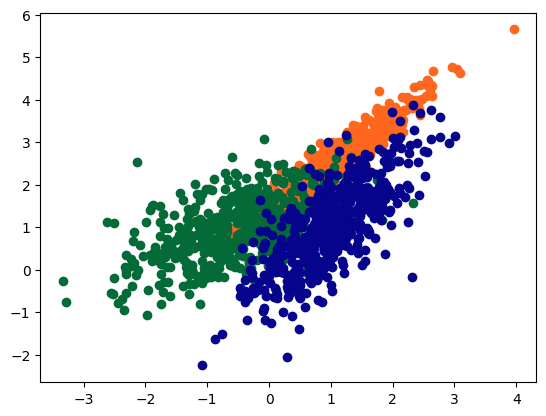

itr:1->


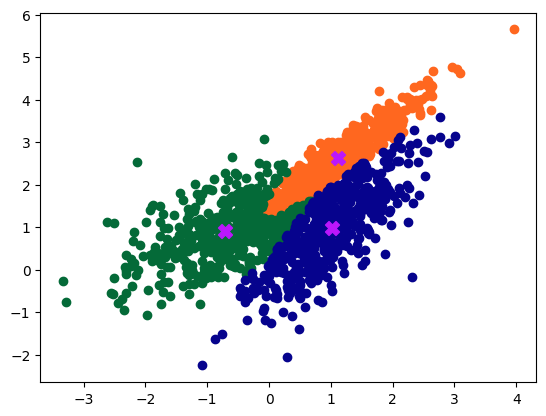

itr:2->


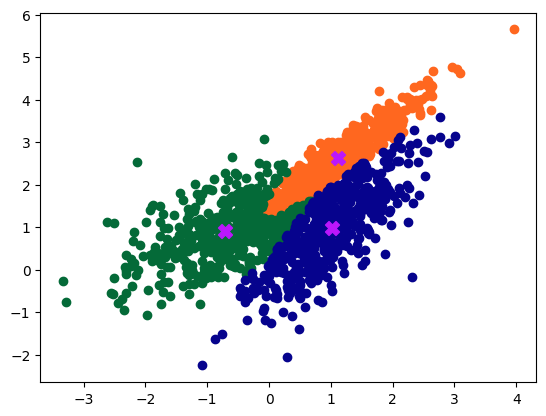

itr:3->


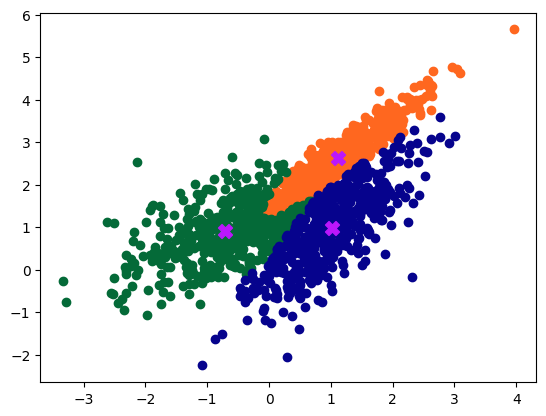

itr:4->


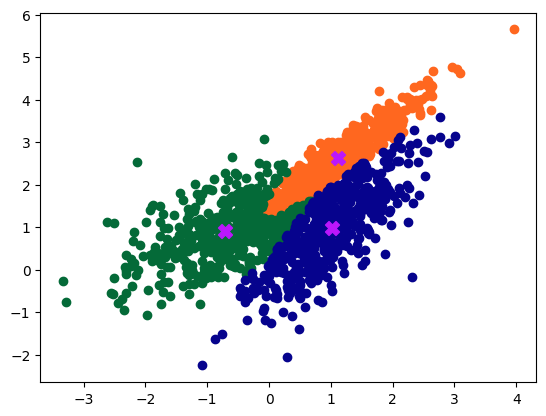

itr:5->


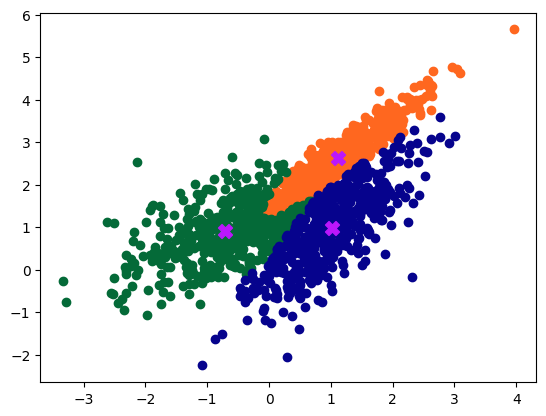

In [ ]:
itr = 0
for i in range(3):
  X, Y = Points[i][:,0], Points[i][:,1]
  plt.scatter(X, Y, c=Colors[i])
plt.show()
for _ in range(5):
  itr += 1
  _Points = {}
  for i in range(3):
    _Points[i] = []
  for i in range(3):
    for j in range(n):
      point = Points[i][j]
      maxprob, index = 0, 0
      for k in range(3):
        mvn = multivariate_normal(mean=Mean[k], cov=Cov[k])
        prob = mvn.pdf(point)
        if prob > maxprob:
          index = k
          maxprob = prob
      _Points[index].append(point)
  for i in range(3):
    A = np.array(_Points[i])
    X, Y = A[:,0], A[:,1]
    plt.scatter(X, Y, c=Colors[i])
    mu = np.mean(A, axis=0)
    plt.scatter(mu[0], mu[1], marker='X', s=100, c="#bb17fc")
  print(f'itr:{itr}->')
  plt.show()